# FIGURE 2. EMT AND SIGNALING OF AXL MUTANTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from msresist.pre_processing import preprocessing
from msresist.figures.figure1 import plotClustergram, selectpeptides, FC_timecourse, barplot_UtErlAF154, IndividualTimeCourses
import warnings
warnings.simplefilter("ignore")

sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [2]:
pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## CELL MIGRATION

## Time Course

### Relative Wound Density (RWD)

Calculates the density of both the cell region and the wound region as defined by the initial scratch wound mask, and measures (%) of the density of the wound region (W) relative to the density of the cell region(c):


$$ RWD(t) = \frac{W(t)-W(0)}{C(t)-W(0)} $$

In [3]:
# rwdM = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_RWD_Matrigel_BR1.csv")
r1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR1_RWD.csv")
r2 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR2_RWD.csv")
r3 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR3_RWD.csv")
r4 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR4_RWD.csv")
lines = ["WT", "KO", "KI", "KD", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]

In [4]:
cols = []
for label in r1.columns:
    if "UT" in label:
        cols.append(label.split(" ")[0])
    else:
        cols.append(label.replace(" ", "-"))

r1.columns = cols
r2.columns = cols
r3.columns = cols
r4.columns = cols

In [5]:
r1.columns

Index(['Elapsed', 'PC9', 'PC9-E', 'PC9-AF', 'PC9-A/E', 'KO', 'KO-E', 'KO-AF',
       'KO-A/E', 'KIN', 'KIN-E', 'KIN-AF', 'KIN-A/E', 'KD', 'KD-E', 'KD-AF',
       'KD-A/E', 'M4', 'M4-E', 'M4-AF', 'M4-A/E', 'M5', 'M5-E', 'M5-AF',
       'M5-A/E', 'M7', 'M7-E', 'M7-AF', 'M7-A/E', 'M10', 'M10-E', 'M10-AF',
       'M10-A/E', 'M11', 'M11-E', 'M11-AF', 'M11-A/E', 'M15', 'M15-E',
       'M15-AF', 'M15-A/E'],
      dtype='object')

In [6]:
ds = [r2, r3, r4]
itp = 0
ftp = 24
t1 = ["UT", "AF", "-E", "A/E"]
t2 = ["Untreated", "AF154", "Erlotinib", "Erl + AF154"]
ylabel = "Relative Wound Density"

1560
1560


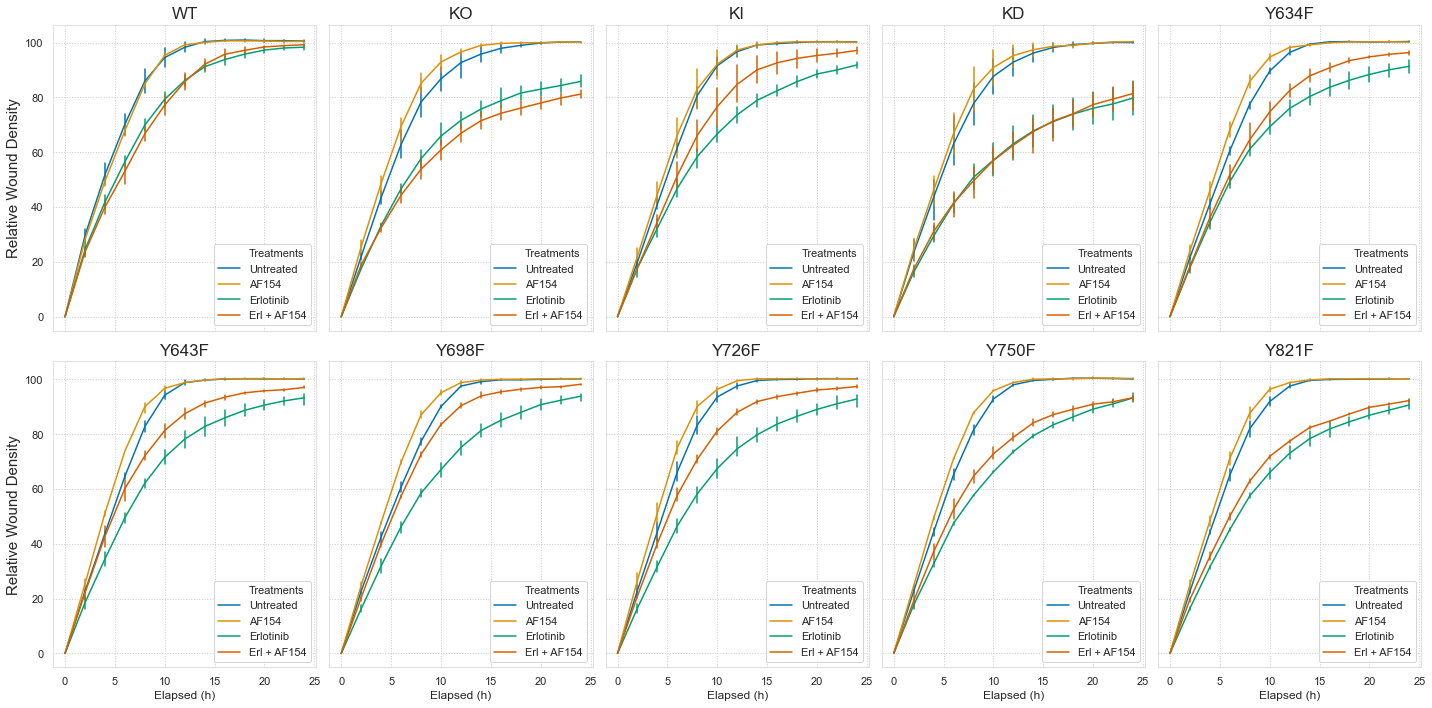

In [9]:
IndividualTimeCourses(ds, itp, ftp, lines, t1, t2, ylabel, FC=False, savefig=True, figsize=(20, 10))

## At specified Endpoint

### RWD

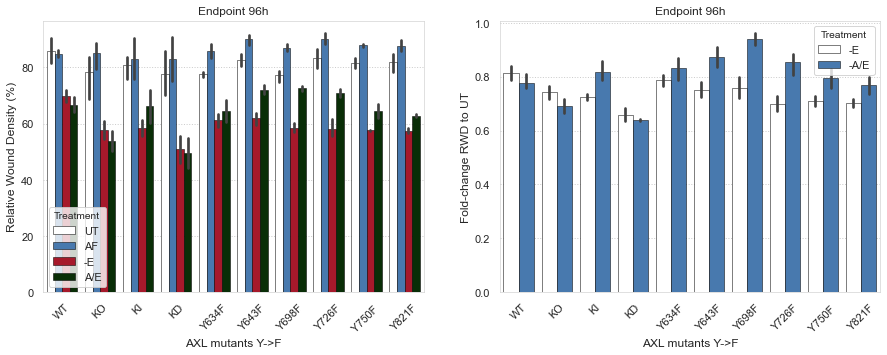

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ftp = 8
itp = 0

tr1 = ["UT", "AF", "-E", "A/E"]
tr2 = ["Untreated", "AF154", "Erlotinib", "Erl + AF154"]

c = ["white", "windows blue", "scarlet", "dark green"]
barplot_UtErlAF154(ax[0], lines, ds, itp, ftp, tr1, tr2, "Relative Wound Density (%)", "Endpoint 96h", FC=False, colors=c)

tr1 = ["-E", "-A/E"]
tr2 = ["Erlotinib", "Erl + AF154"]
barplot_UtErlAF154(ax[1], lines, ds, itp, ftp, tr1, tr2, "Fold-change RWD to UT", "Endpoint 96h", FC="UT", colors=c)

fig.savefig("AXLmutants_CV_96h.png")

## SIGNALING

## Selecting and Clustering a subset of kinases of interest

In [ ]:
A = preprocessing(Axlmuts_ErlF154=True, motifs=True, log2T=True, mc_row=True)
A.columns = list(A.columns[:5]) + ["WT", "Knock-Out", "Kinase Dead", "Knock-In", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F", "Y821F"]

B = preprocessing(Axlmuts_Erl=True, motifs=True, log2T=True, mc_row=True)
B.columns = A.columns

In [ ]:
koi = {"AXL":["Y702-p", "Y759-p", "Y866-p"], "EGFR":"Y1197-p", "MET":"Y1003-p", "ERBB2":"Y877-p", "ERBB3":"Y1328-p", "EPHB3":"Y792-p", "GAB1":"Y627-p", "GAB2":"T265-p", "CRK":"Y251-p", 
    "CRKL":"Y251-p", "SHC1":"S426-p", "MAPK1":"Y187-p;T185-p", "MAPK7":"Y221-p", "MAPK12":"Y185-p", "MAPK13":"Y182-p", "MAPK14":"Y182-p", "BCAR1":["Y128-p", "Y410-p"], "BCAR3":"Y212-p", "NME2":"Y52-p",
    "DOCK1":"Y1811-p", "ELMO2":"Y48-p", "PTPN11":["Y542-p", "Y584-p"], "NEDD9":["189-p", "S182-p"], "TNS1":"Y1326-p", "TNS2":"Y483-p", "TNS3":["Y802-p", "Y855-p"], "CTTN":["Y421-p", "Y421-p;S418-p"], 
    "ANKS1A":"Y455-p", "FLNB":"Y2505-p", "PRKCD":"Y313-p", "ADAM9":["S816-p", "T777-p"], "BRK1":"Y63-p", "ARAP1":"Y231-p", "CTNND1":"Y228-p", "TNK2":"Y284-p", "RIN1":"Y681-p", "MCAM":"Y641-p", "SRCIN1":"Y396-p",
    "ITGB1":"T789-p", "ITGB4":"Y1207-p"
}

In [ ]:
A = A.copy().set_index(["Abbv", "Position"])
B = B.copy().set_index(["Abbv", "Position"])

In [ ]:
Ams = selectpeptides(A.drop("WT", axis=1), koi)
Aredd = Ams.set_index(["Abbv", "Position"]).iloc[:, 3:].astype("float")

Bms = selectpeptides(B, koi)
Bredd = Bms.set_index(["Abbv", "Position"]).iloc[:, 3:].astype("float")

In [ ]:
plotClustergram(Aredd.T, "Reduced MS AXL mutants +Erl +F154", max(np.max(np.abs(Aredd)) * 0.3), figsize=(15, 7))

In [ ]:
plotClustergram(Bredd.T, "Reduced MS AXL mutants +Erlotinib", max(np.max(np.abs(Bredd)) * 0.3), figsize=(15, 7))